In [1]:
# Libraries:
import random
import numpy as np
import pandas as pd         
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# Daten einlesen:
df = pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/df.csv")
zambia = pd.read_csv('C:/Users/rene-/Git/dfDeepDL/anwendung/zambia_test.csv')
y = zambia["zscore_norm"]
c_age = zambia["c_age"]
c_breastf = zambia["c_breastf"]

m1_fitted = pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/m1_fitted.csv")
m1_plot =  pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/m1_plot_data.csv")
nn1_pred = pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung//nn1_pred.csv")

m2_fitted = pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/m2_fitted.csv")
m2_plot =  pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/m2_plot_data.csv")
nn2_pred = pd.read_csv("C:/Users/rene-/Git/dfDeepDL/anwendung/nn2_pred.csv")

____

# 1. Genutzte Modelle Set Spline(c_age) und ANN(c_breastfd)

____

### Spline(c_age)

```R
Family: gaussian 
Link function: identity 

Formula:
zscore_norm ~ s(c_age) - 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(c_age) 2.819  3.512 24.24  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0988   Deviance explained = 10.1%
GCV = 0.87046  Scale est. = 0.8674    n = 800

edf:    2.819355
edf1:   3.512079
cdf:    3.819355 
```
----

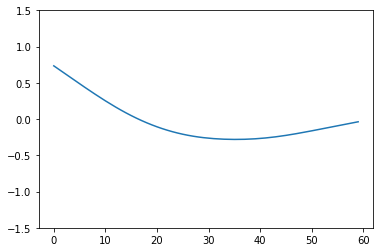

In [6]:
plt.plot(m1_plot["c_age"], m1_plot["m1_pred"])
plt.ylim(-1.5, 1.5)
plt.show()

### Model 2 ANN(c_breastf)

```python
random.seed(42)
tf.random.set_seed(42)
m1 = tf.keras.Sequential()
m1.add(tf.keras.layers.Dense(10, activation='relu', batch_input_shape=(None, 1)))
m1.add(tf.keras.layers.Dense(10, activation='relu'))
m1.add(tf.keras.layers.Dense(1, activation='linear'))
m1.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.001))
hist1 = m1.fit(c_breastf, y, epochs = 2500, batch_size=400, use_multiprocessing=True, verbose=0)
```
___

In [7]:
plot_nn1 = pd.concat([c_breastf, nn1_pred], axis=1)
test = plot_nn1.sort_values(by="c_breastf")

In [8]:
plt.plot(test["c_breastf"], test["nn1_pred"])
plt.ylim(-1.5, 1.5)
plt.show()

# 1.2. Modelle zusammenführen

### Zielgrößen ausrechnen

$$
    C(w) = || y - \hat{y}(w) ||^{2} + 2 \hat{\sigma}^{2} w^{T} \rho
$$

____

## Augmented Lagrangian

```R
Iter: 1 fn: 698.3652	 Pars:  0.18087 0.81913
Iter: 2 fn: 698.3652	 Pars:  0.18087 0.81913
Completed in 2 major iterations

$pars
[1] 0.1808668 0.8191332

$convergence
[1] 0

$values
[1] 700.3247 698.3652 698.3652

$lagrange
          [,1]
[1,] 0.3650089

$hessian
          [,1]      [,2]
[1,]  5.892774 -8.516229
[2,] -8.516229 15.574318

$ineqx0
NULL

$nfuneval
[1] 53

$outer.iter
[1] 2

$elapsed
Time needed 0.02200007 secs.

$vscale
[1] 698.36517448   0.00000001   1.00000000   1.00000000

```

____



## Vergleich der Modelle:

Wert des Kriterium ohne Gewichtung: <br>
Model 1: 711.2746 <br>
Model 2: 698.9946 <br>
<u> Gewichtet:   698.3652 </u>
 
MSE der beiden Modelle ohne Gewichtung: <br>
Model 1: 0.8643 <br>
Model 2: 0.8640 <br>
<u> Gewichtet: 0.8627 </u>
____

___

# 2. Genutzte Modelle Set ANN(c_age) und Spline(c_breastfd)


### Model 1 Spline(c_breastfd)

```R
Family: gaussian 
Link function: identity 

Formula:
zscore_norm ~ s(zambia$c_breastf) - 1

Approximate significance of smooth terms:
                      edf Ref.df     F p-value    
s(zambia$c_breastf) 8.055  8.727 9.816  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0932   Deviance explained = 10.1%
GCV = 0.88169  Scale est. = 0.87281   n = 800

---
edf:    8.054608
edf1:   8.727034
cdf:    9.054608

```

----

In [9]:
plt.plot(m2_plot["c_breastf"], m2_plot["m2_pred"])
plt.ylim(-1.5, 1.5)
plt.show()

### ANN (c_age) 

```python
random.seed(42)
tf.random.set_seed(42)
m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.Dense(10, activation='relu', batch_input_shape=(None, 1)))
m2.add(tf.keras.layers.Dense(10, activation='relu'))
m2.add(tf.keras.layers.Dense(1, activation='linear'))
m2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.001))
hist2 = m2.fit(c_age, y, epochs = 2500, batch_size=400, use_multiprocessing=True, verbose=0)

```

____

# 2.1. Modelle zusammenführen

```R
Iter: 1 fn: 728.2659	 Pars:  0.42865 0.57135
Iter: 2 fn: 728.2659	 Pars:  0.42865 0.57135
Completed in 2 major iterations
$pars
[1] 0.4286501 0.5713499

$convergence
[1] 0

$values
[1] 728.4556 728.2659 728.2659

$lagrange
         [,1]
[1,] 1.982103

$hessian
          [,1]       [,2]
[1,] 64.936473 -4.3528170
[2,] -4.352817  0.8654737

$ineqx0
NULL

$nfuneval
[1] 46

$outer.iter
[1] 2

$elapsed
Time needed 0.01160693 secs

$vscale
[1] 728.26593036   0.00000001   1.00000000   1.00000000
```

____ 


## Vergleich der Modelle:

Wert des Kriterium ohne Gewichtung: <br>
Model 1: 740.4276 <br>
Model 2: 735.1112 <br>

<u> Gewichtet: 728.2659 </u>

MSE der beiden Modelle ohne Gewichtung: <br>
Model 1: 0.8640229 <br>
Model 2: 0.9118407 <br>

<u> Gewichtet: 0.8799384 </u>
____